In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import pickle

In [19]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
new_base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
#'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/'

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [20]:
# Getting data
all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths"))

In [21]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0


In [22]:
len(all_data)

20251

In [23]:
all_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [24]:
# Opening csv with human development index
dev_index = pd.read_csv('developed_countries.csv')
dev_index.head()

,name,humanDevelopmentIndex,pop2020
0,Norway,0.953,5421.241
1,Switzerland,0.944,8654.622
2,Australia,0.939,25499.884
3,Ireland,0.938,4937.786
4,Germany,0.936,83783.942


In [25]:
# Opening csv with country data
over_65 = pd.read_csv('country_data.csv', usecols=[0,62])
over_65.head()

,Country Name,2018
0,Aruba,13.550947
1,Afghanistan,2.584927
2,Angola,2.216374
3,Albania,13.744736
4,Andorra,NaN


In [26]:
over_65[over_65['2018'].isna()]

,Country Name,2018
4,Andorra,NaN
9,American Samoa,NaN
25,Bermuda,NaN
50,Cayman Islands,NaN
55,Dominica,NaN
67,Eritrea,NaN
76,Faroe Islands,NaN
82,Gibraltar,NaN
89,Greenland,NaN
106,Isle of Man,NaN


In [27]:
# Manually adding missing values
over_65.loc[over_65['Country Name'] == 'Andorra', '2018'] = 16.18
over_65.loc[over_65['Country Name'] == 'American Samoa', '2018'] = 6.24
over_65.loc[over_65['Country Name'] == 'Bermuda', '2018'] = 18.53
over_65.loc[over_65['Country Name'] == 'Cayman Islands', '2018'] = 13.13
over_65.loc[over_65['Country Name'] == 'Dominica', '2018'] = 11.43
over_65.loc[over_65['Country Name'] == 'Eritrea', '2018'] = 3.95
over_65.loc[over_65['Country Name'] == 'Faroe Islands', '2018'] = 16.98
over_65.loc[over_65['Country Name'] == 'Gibraltar', '2018'] = 16.28
over_65.loc[over_65['Country Name'] == 'Greenland', '2018'] = 9.57
over_65.loc[over_65['Country Name'] == 'Isle of Man', '2018'] = 20.6
over_65.loc[over_65['Country Name'] == 'St. Kitts and Nevis', '2018'] = 9.03
over_65.loc[over_65['Country Name'] == 'Liechtenstein', '2018'] = 17.91
over_65.loc[over_65['Country Name'] == 'St. Martin', '2018'] = 8.38
over_65.loc[over_65['Country Name'] == 'Monaco', '2018'] = 33.15
over_65.loc[over_65['Country Name'] == 'Marshall Islands', '2018'] = 4.24
over_65.loc[over_65['Country Name'] == 'Nauru', '2018'] = 2.86
over_65.loc[over_65['Country Name'] == 'Palau', '2018'] = 8.5
over_65.loc[over_65['Country Name'] == 'San Marino', '2018'] = 19.8
over_65.loc[over_65['Country Name'] == 'Turks and Caicos Islands', '2018'] = 4.76
over_65.loc[over_65['Country Name'] == 'Tuvalu', '2018'] = 6.28
over_65.loc[over_65['Country Name'] == 'British Virgin Islands', '2018'] = 9.32
over_65.loc[over_65['Country Name'] == 'Kosovo', '2018'] = 7.43

In [28]:
over_65[over_65['2018'].isna()]

,Country Name,2018
108,Not classified,NaN
145,St. Martin (French part),NaN
162,Northern Mariana Islands,NaN
223,Sint Maarten (Dutch part),NaN


In [29]:
# Creating and pickling age dictionary
over_65_dict = dict(zip(over_65['Country Name'], over_65['2018']))

with open('./pickled_files/age_dict.pkl', 'wb') as f:
    pickle.dump(over_65_dict, f)
over_65_dict

{'Aruba': 13.5509471396854,
 'Afghanistan': 2.58492693988024,
 'Angola': 2.21637364776329,
 'Albania': 13.7447359109736,
 'Andorra': 16.18,
 'Arab World': 4.55787642361103,
 'United Arab Emirates': 1.0850009848448101,
 'Argentina': 11.1177888760774,
 'Armenia': 11.2538176570131,
 'American Samoa': 6.24,
 'Antigua and Barbuda': 8.79982551980558,
 'Australia': 15.656475227559099,
 'Austria': 19.0015664595899,
 'Azerbaijan': 6.195182750714929,
 'Burundi': 2.24694046033717,
 'Belgium': 18.7887437383395,
 'Benin': 3.25360529746338,
 'Burkina Faso': 2.4069808286635497,
 'Bangladesh': 5.15839063962068,
 'Bulgaria': 21.021914434268,
 'Bahrain': 2.42633387832394,
 'Bahamas, The': 7.25760235662035,
 'Bosnia and Herzegovina': 16.4703174710621,
 'Belarus': 14.8451481743098,
 'Belize': 4.736458776571441,
 'Bermuda': 18.53,
 'Bolivia': 7.19194739218447,
 'Brazil': 8.92283783244003,
 'Barbados': 15.802693962133802,
 'Brunei Darussalam': 4.8731475675058205,
 'Bhutan': 6.003011712805611,
 'Botswana': 4

In [30]:
# Creating and pickling population dictionary
pop_dict = dict(zip(dev_index.name, dev_index.pop2020))

with open('./pickled_files/population_dict.pkl', 'wb') as f:
    pickle.dump(pop_dict, f)
pop_dict

{'Norway': 5421.241,
 'Switzerland': 8654.622,
 'Australia': 25499.884,
 'Ireland': 4937.786,
 'Germany': 83783.942,
 'Iceland': 341.243,
 'Sweden': 10099.265,
 'Hong Kong': 7496.981,
 'Singapore': 5850.342,
 'Netherlands': 17134.872,
 'Denmark': 5792.202,
 'Canada': 37742.154,
 'United States': 331002.651,
 'United Kingdom': 67886.011,
 'Finland': 5540.72,
 'New Zealand': 4822.233,
 'Belgium': 11589.623,
 'Liechtenstein': 38.128,
 'Japan': 126476.461,
 'Austria': 9006.398,
 'Luxembourg': 625.978,
 'South Korea': 51269.185,
 'Israel': 8655.535,
 'France': 65273.511,
 'Slovenia': 2078.938,
 'Spain': 46754.778,
 'Czech Republic': 10708.981,
 'Italy': 60461.826,
 'Malta': 441.543,
 'Estonia': 1326.535,
 'Greece': 10423.054,
 'Cyprus': 1207.359,
 'Poland': 37846.611,
 'United Arab Emirates': 9890.402,
 'Lithuania': 2722.289,
 'Andorra': 77.265,
 'Qatar': 2881.053,
 'Slovakia': 5459.642,
 'Brunei': 437.479,
 'Saudi Arabia': 34813.871,
 'Portugal': 10196.709,
 'Latvia': 1886.198,
 'Bahrain':

In [31]:
# Creating and pickling index dictionary
index_dict = dict(zip(dev_index.name, dev_index.humanDevelopmentIndex))
with open('./pickled_files/dev_index_dict.pkl',  'wb') as f:
    pickle.dump(index_dict, f)
index_dict

{'Norway': 0.953,
 'Switzerland': 0.944,
 'Australia': 0.939,
 'Ireland': 0.938,
 'Germany': 0.936,
 'Iceland': 0.935,
 'Sweden': 0.933,
 'Hong Kong': 0.933,
 'Singapore': 0.932,
 'Netherlands': 0.931,
 'Denmark': 0.929,
 'Canada': 0.926,
 'United States': 0.924,
 'United Kingdom': 0.922,
 'Finland': 0.92,
 'New Zealand': 0.917,
 'Belgium': 0.916,
 'Liechtenstein': 0.916,
 'Japan': 0.909,
 'Austria': 0.908,
 'Luxembourg': 0.904,
 'South Korea': 0.903,
 'Israel': 0.903,
 'France': 0.901,
 'Slovenia': 0.896,
 'Spain': 0.891,
 'Czech Republic': 0.888,
 'Italy': 0.88,
 'Malta': 0.878,
 'Estonia': 0.871,
 'Greece': 0.87,
 'Cyprus': 0.869,
 'Poland': 0.865,
 'United Arab Emirates': 0.863,
 'Lithuania': 0.858,
 'Andorra': 0.858,
 'Qatar': 0.856,
 'Slovakia': 0.855,
 'Brunei': 0.853,
 'Saudi Arabia': 0.853,
 'Portugal': 0.847,
 'Latvia': 0.847,
 'Bahrain': 0.846,
 'Chile': 0.843,
 'Hungary': 0.838,
 'Croatia': 0.831,
 'Argentina': 0.825,
 'Oman': 0.821,
 'Russia': 0.816,
 'Montenegro': 0.814,


In [32]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0


In [33]:
all_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
date              datetime64[ns]
CumConfirmed               int64
CumDeaths                  int64
dtype: object

In [34]:
# def to_float(series):
#     series.astype(float)
#     return series

In [35]:
grouped_country = all_data.groupby('Country/Region').max().reset_index()
grouped_country.head()

,Country/Region,Province/State,Lat,Long,date,CumConfirmed,CumDeaths
0,Afghanistan,<all>,33.0000,65.0000,2020-04-07,423,14
1,Albania,<all>,41.1533,20.1683,2020-04-07,383,22
2,Algeria,<all>,28.0339,1.6596,2020-04-07,1468,193
3,Andorra,<all>,42.5063,1.5218,2020-04-07,545,22
4,Angola,<all>,-11.2027,17.8739,2020-04-07,17,2


In [36]:
# Grouping data by country
grouped_country.drop('Province/State', axis=1, inplace=True)


In [37]:
grouped_country.head()


,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths
0,Afghanistan,33.0000,65.0000,2020-04-07,423,14
1,Albania,41.1533,20.1683,2020-04-07,383,22
2,Algeria,28.0339,1.6596,2020-04-07,1468,193
3,Andorra,42.5063,1.5218,2020-04-07,545,22
4,Angola,-11.2027,17.8739,2020-04-07,17,2


In [38]:
grouped_country['dev_index'] = grouped_country['Country/Region'].map(index_dict)
grouped_country['population'] = grouped_country['Country/Region'].map(pop_dict)
grouped_country['perc_65'] = grouped_country['Country/Region'].map(over_65_dict)
grouped_country.set_index('Country/Region', inplace=True)
grouped_country.head()

,Lat,Long,date,CumConfirmed,CumDeaths,dev_index,population,perc_65
Country/Region,,,,,,,,
Afghanistan,33.0000,65.0000,2020-04-07,423,14,0.498,38928.346,2.584927
Albania,41.1533,20.1683,2020-04-07,383,22,0.785,2877.797,13.744736
Algeria,28.0339,1.6596,2020-04-07,1468,193,0.754,43851.044,6.362497
Andorra,42.5063,1.5218,2020-04-07,545,22,0.858,77.265,16.180000
Angola,-11.2027,17.8739,2020-04-07,17,2,0.581,32866.272,2.216374


In [40]:
grouped_country.loc['US']

Lat                         37.0902
Long                       -95.7129
date            2020-04-07 00:00:00
CumConfirmed                 396223
CumDeaths                     12722
dev_index                       NaN
population                      NaN
perc_65                         NaN
Name: US, dtype: object

In [198]:
# Adding missing values

grouped_country.loc['US', 'dev_index'] = 0.924
grouped_country.loc['Korea, South', 'dev_index'] = 0.903


grouped_country.loc['US', 'population'] = 331002.651
grouped_country.loc['Korea, South', 'population'] = 51269.185


grouped_country.loc['US', 'population'] = 331002.651
grouped_country.loc['Korea, South', 'population'] = 51269.185
grouped_country.loc['Iran', 'perc_65'] = 5.48
grouped_country.loc['US', 'perc_65'] = 15.8076540556035

grouped_country

,Lat,Long,date,CumConfirmed,CumDeaths,dev_index,population,perc_65
Country/Region,,,,,,,,
Afghanistan,33.0000,65.0000,2020-04-03,281,6,0.498,38928.346,2.584927
Albania,41.1533,20.1683,2020-04-03,304,17,0.785,2877.797,13.744736
Algeria,28.0339,1.6596,2020-04-03,1171,105,0.754,43851.044,6.362497
Andorra,42.5063,1.5218,2020-04-03,439,16,0.858,77.265,16.180000
Angola,-11.2027,17.8739,2020-04-03,8,2,0.581,32866.272,2.216374
...,...,...,...,...,...,...,...,...
Venezuela,6.4238,-66.5897,2020-04-03,153,7,0.761,28435.940,NaN
Vietnam,16.0000,108.0000,2020-04-03,237,0,0.694,97338.579,7.274978
West Bank and Gaza,31.9522,35.2332,2020-04-03,194,1,NaN,NaN,3.133306


In [199]:
grouped_country['DeathRate'] = (grouped_country.CumDeaths/grouped_country.CumConfirmed)*100
grouped_country.head()

,Lat,Long,date,CumConfirmed,CumDeaths,dev_index,population,perc_65,DeathRate
Country/Region,,,,,,,,,
Afghanistan,33.0000,65.0000,2020-04-03,281,6,0.498,38928.346,2.584927,2.135231
Albania,41.1533,20.1683,2020-04-03,304,17,0.785,2877.797,13.744736,5.592105
Algeria,28.0339,1.6596,2020-04-03,1171,105,0.754,43851.044,6.362497,8.966695
Andorra,42.5063,1.5218,2020-04-03,439,16,0.858,77.265,16.180000,3.644647
Angola,-11.2027,17.8739,2020-04-03,8,2,0.581,32866.272,2.216374,25.000000


In [211]:
# sort df by Count column
grouped_country = grouped_country.sort_values(['DeathRate'], ascending=False).reset_index()
grouped_country.head()

,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,dev_index,population,perc_65,DeathRate
0,Gambia,13.4432,-15.3101,2020-04-03,4,1,0.460,2416.668,NaN,25.000000
1,Angola,-11.2027,17.8739,2020-04-03,8,2,0.581,32866.272,2.216374,25.000000
2,Botswana,-22.3285,24.6849,2020-04-03,4,1,0.717,2351.627,4.223874,25.000000
3,MS Zaandam,0.0000,0.0000,2020-04-03,9,2,NaN,NaN,NaN,22.222222
4,Sudan,12.8628,30.2176,2020-04-03,10,2,0.502,43849.260,3.581161,20.000000


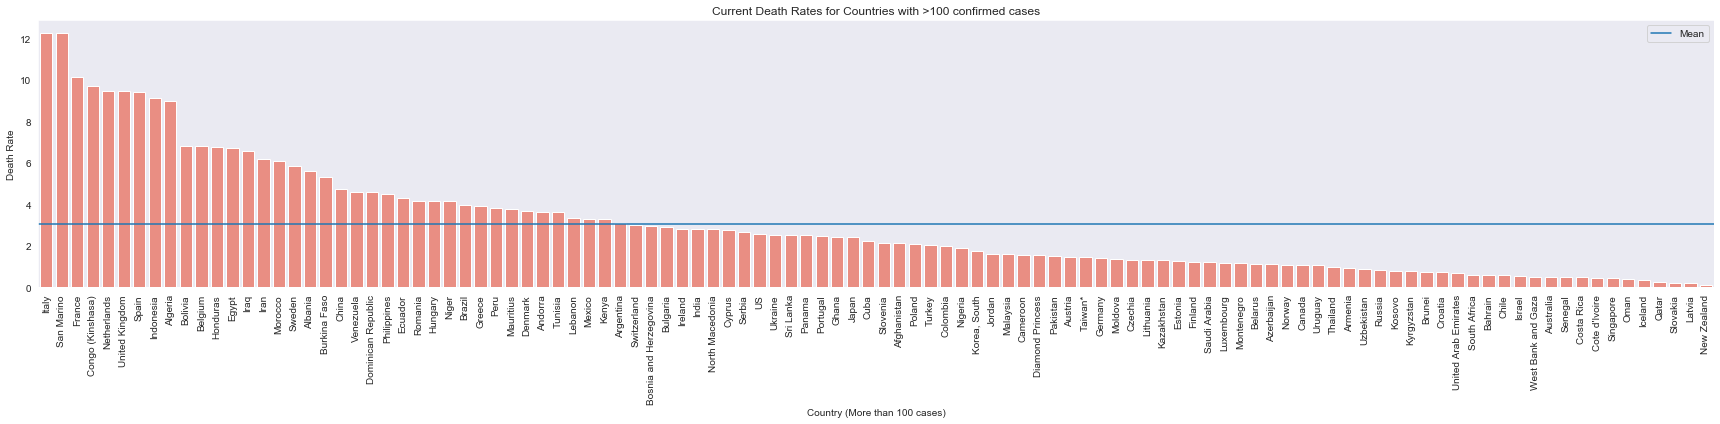

In [212]:
greater_one = grouped_country[grouped_country['DeathRate'] > 0]

more_than_100 = greater_one[greater_one.CumConfirmed > 100]

mean = more_than_100.DeathRate.mean()


fig, ax = plt.subplots(figsize=(24, 6))
ax = sns.barplot(x=more_than_100['Country/Region'], y=more_than_100.DeathRate, data=more_than_100, color="salmon")
ax.axhline(mean, label='Mean')
ax.set_title('Current Death Rates for Countries with >100 confirmed cases')
plt.xticks(rotation=90)
ax.set(xlabel='Country (More than 100 cases)', ylabel='Death Rate')
plt.tight_layout()
plt.legend()
plt.savefig('current_death_rates.png', dpi=600)

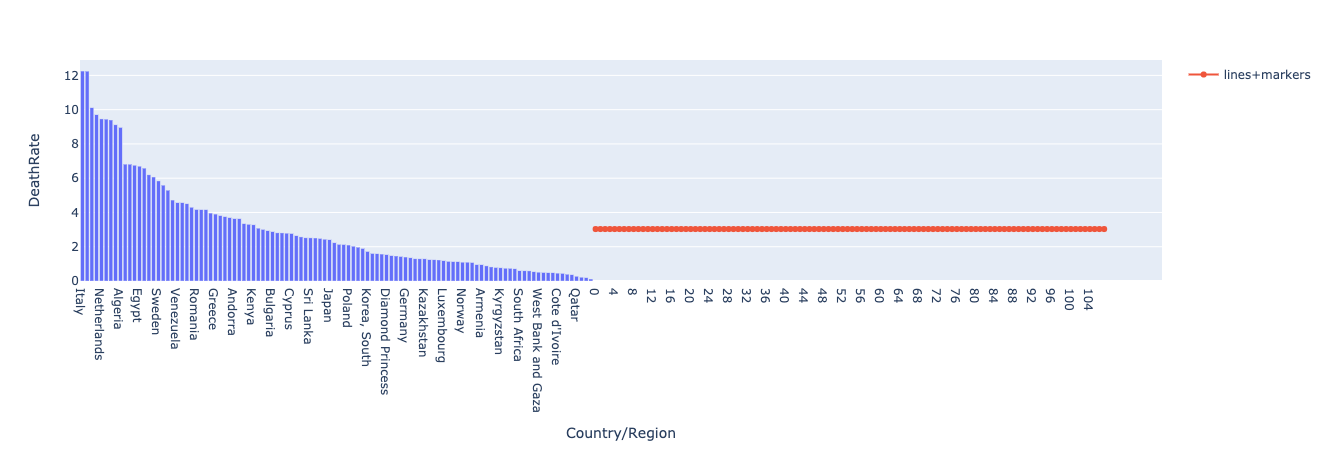

In [225]:
import plotly.express as px

fig = px.bar(more_than_100, y='DeathRate', x='Country/Region', text='CumDeaths')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.add_trace(go.Scatter(x=list(range(len(more_than_100))), y=[mean for i in range(len(more_than_100))],
                    mode='lines+markers',
                    name='lines+markers'))
fig.show()

In [202]:
more_than_100.head()

,Lat,Long,date,CumConfirmed,CumDeaths,dev_index,population,perc_65,DeathRate
Country/Region,,,,,,,,,
Italy,43.0000,12.0000,2020-04-03,119827,14681,0.880,60461.826,22.751680,12.251830
San Marino,43.9424,12.4578,2020-04-03,245,30,NaN,NaN,19.800000,12.244898
France,46.2276,165.6180,2020-04-03,64338,6507,0.901,65273.511,20.034625,10.113774
Congo (Kinshasa),-4.0383,21.7587,2020-04-03,134,13,NaN,NaN,NaN,9.701493
Netherlands,52.1326,5.2913,2020-04-03,15723,1487,0.931,17134.872,19.196193,9.457483


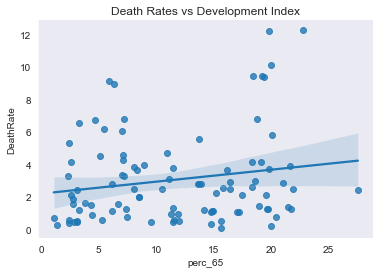

In [204]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="perc_65", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index.png', dpi=600)

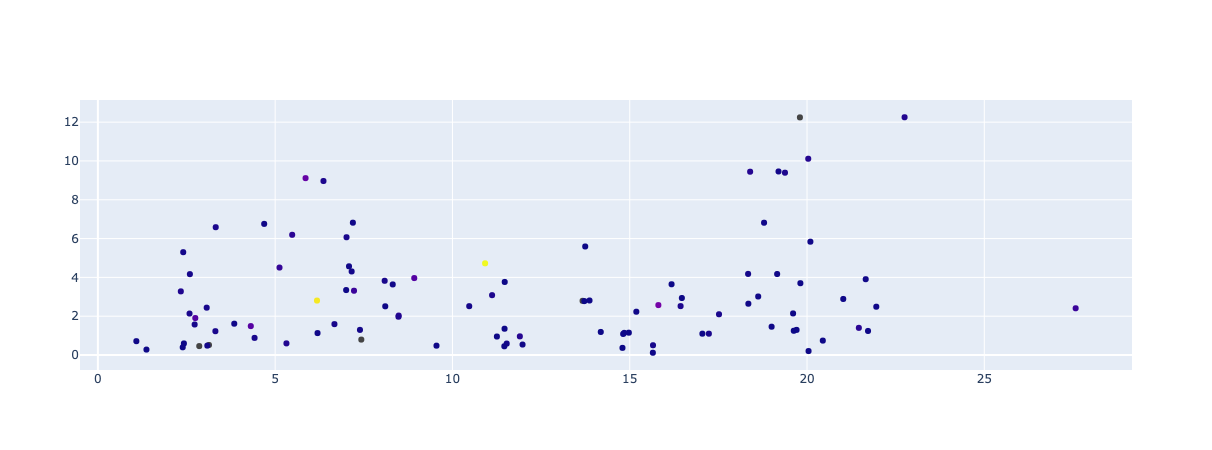

In [234]:
import plotly.express as px

fig = go.Figure(data=go.Scatter(
                x=more_than_100['perc_65'],
                y=more_than_100['DeathRate'],
                mode='markers', marker= dict(color=more_than_100['population'])
))
fig.show()

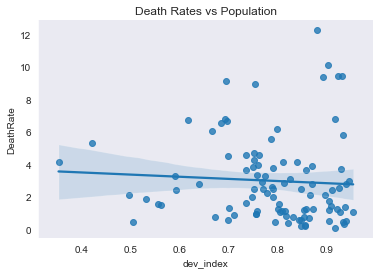

In [205]:
fix, ax = plt.subplots()


sns.set_style('dark')
size = dev_index.pop2020
ax = sns.regplot(x="dev_index", y="DeathRate", data=more_than_100)
ax.set_title('Death Rates vs Population')
sns.despine()
plt.savefig('death_rate_v_population.png', dpi=600)

/Users/rogerlefort/anaconda3/envs/corona/lib/python3.8/site-packages/seaborn/axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



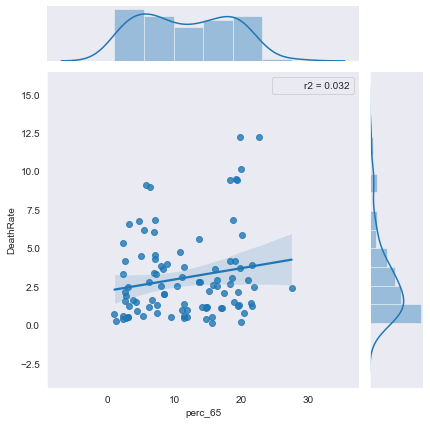

In [206]:
from scipy import stats

x = more_than_100.perc_65
y = more_than_100.DeathRate

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2)
plt.savefig('death_rate_v_age_pearson.png', dpi=600)

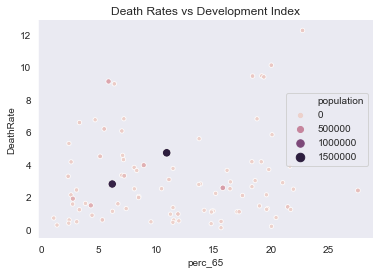

In [207]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="perc_65", y="DeathRate", data=more_than_100, size='population', hue="population")
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('death_rate_v_dev_index_2.png', dpi=600)

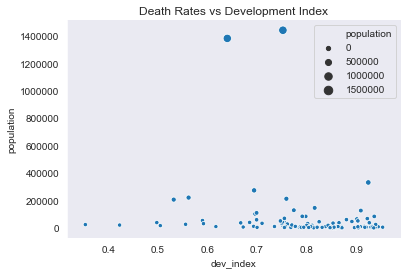

In [37]:
fix, ax = plt.subplots()

sns.set_style('dark')
#size = dev_index['pop2020']
ax = sns.scatterplot(x="dev_index", y="population", data=more_than_100, size='population')
ax.set_title('Death Rates vs Development Index')
sns.despine()
plt.savefig('pop_v_dev_index.png', dpi=600)

In [244]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data


# Country
country = grouped_country['Country/Region']


# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "choropleth", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Choropleth(
        locations = grouped_country['code'],
        z = grouped_country['CumConfirmed'],
#         text = grouped_countries['CumConfirmed'],
        colorscale = 'Reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = '',
    )
)
# fig.update_layout(margin={
#         "r": 500,
#         "t": 500,
#         "l": 500,
#         "b": 500
#     }, coloraxis_showscale=False)



# Add locations bar chart
fig.add_trace(
    go.Bar(x=more_than_100["Country/Region"],y=more_than_100["DeathRate"], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)
fig.update_layout(xaxis={'categoryorder':'total descending'})

# # Add 3d surface of volcano
# fig.add_trace(
#     go.Surface(z=df_v.values.tolist(), showscale=False),
#     row=2, col=2
# )

# # Update geo subplot properties
# fig.update_geos(
#     projection_type="orthographic",
#     landcolor="white",
#     oceancolor="MidnightBlue",
#     showocean=True,
#     lakecolor="LightBlue"
# )

# # Rotate x-axis labels
# fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(coloraxis_showscale=False,
            coloraxis_colorbar=dict(
    title="Number of Bills per Cell",
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=50,
    yanchor="top", y=1,
    ticks="outside", ticksuffix=" bills",
    dtick=5),      
    template="plotly_dark",
    margin=dict(r=0, t=0, b=0, l=0),
    annotations=[
        dict(
            text="Source: NOAA",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

KeyError: 'code'